In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import time

In [2]:
data = pd.read_csv(r"C:\Users\lcatteau\Desktop\data2p7", index_col='SK_ID_CURR').drop(columns='Unnamed: 0')

In [3]:
data.head(5)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,202500.0,406597.5,24700.5,0.018801,-9461,-637,-3648.0,-2120,...,500,0,24.000000,3,15,365243.0,-565.0,-25.0,-17.0,0.0
100003,0,0,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,-1186.0,-291,...,-1,4,10.000000,4,7,365243.0,-716.0,-1980.0,-527.0,1.0
100004,0,0,67500.0,135000.0,6750.0,0.010032,-19046,-225,-4260.0,-2531,...,30,2,4.000000,4,14,365243.0,-784.0,-724.0,-714.0,0.0
100007,0,0,121500.0,513000.0,21865.5,0.028663,-19932,-3038,-4311.0,-3458,...,-1,4,20.666667,1,8,365243.0,-344.0,-2056.0,365243.0,1.0
100008,0,0,99000.0,490495.5,27517.5,0.035792,-16941,-1588,-4970.0,-477,...,110,4,14.000000,3,9,365243.0,-339.0,-2341.0,-66.0,0.0


In [4]:
data

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,202500.0,406597.5,24700.5,0.018801,-9461,-637,-3648.0,-2120,...,500,0,24.000000,3,15,365243.0,-565.0,-25.0,-17.0,0.0
100003,0,0,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,-1186.0,-291,...,-1,4,10.000000,4,7,365243.0,-716.0,-1980.0,-527.0,1.0
100004,0,0,67500.0,135000.0,6750.0,0.010032,-19046,-225,-4260.0,-2531,...,30,2,4.000000,4,14,365243.0,-784.0,-724.0,-714.0,0.0
100007,0,0,121500.0,513000.0,21865.5,0.028663,-19932,-3038,-4311.0,-3458,...,-1,4,20.666667,1,8,365243.0,-344.0,-2056.0,365243.0,1.0
100008,0,0,99000.0,490495.5,27517.5,0.035792,-16941,-1588,-4970.0,-477,...,110,4,14.000000,3,9,365243.0,-339.0,-2341.0,-66.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456247,0,0,112500.0,345510.0,17770.5,0.022800,-11870,-399,-675.0,-3936,...,30,2,7.750000,3,13,365243.0,-419.0,-2722.0,-321.0,0.0
456249,0,0,112500.0,225000.0,22050.0,0.022800,-24384,365243,-7369.0,-2357,...,-1,4,12.000000,1,3,365243.0,-1495.0,-1165.0,-1156.0,0.0
456253,0,0,153000.0,677664.0,29979.0,0.005002,-14966,-7921,-6737.0,-5150,...,22,2,5.000000,1,13,365243.0,-1866.0,-2722.0,-1712.0,0.5


In [5]:
for col in data.columns:
    if data[col].dtype == 'float64':
        data[col] = data[col].astype('float32')
for col in data.columns:
    if data[col].dtype == 'int64':
        data[col] = data[col].astype('int32')

In [6]:
y = data['TARGET']
X = data.drop(columns='TARGET')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=42)

# Dummy Classifier

In [8]:
%%capture masquer_erreurs
start = time.time()
# Définir le modèle 
dummy = DummyClassifier(strategy="most_frequent")

# Adapter le modèle aux données d'entraînement
dummy.fit(X_train, y_train)

# Évaluer la performance du modèle sur l'ensemble de test
accuracy = dummy.score(X_test, y_test)
print("Précision sur l'ensemble de test:", accuracy)
y_predict = dummy.predict(X_test)
print("Précision sur l'AUC:",roc_auc_score(y_test, y_predict))
temps = time.time() - start
print(temps)

In [9]:
print("Précision sur l'ensemble de test:", accuracy)

Précision sur l'ensemble de test: 0.917


In [10]:
print("Précision sur l'AUC:",roc_auc_score(y_test, y_predict))

Précision sur l'AUC: 0.5


<AxesSubplot:>

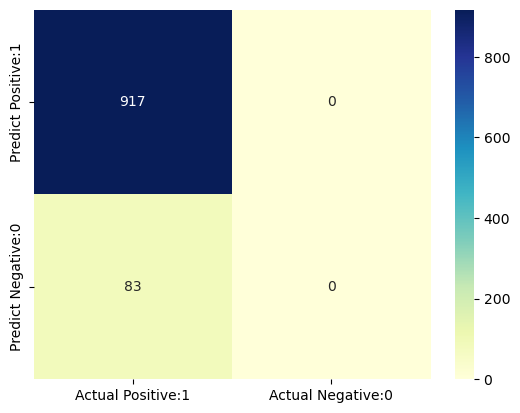

In [11]:
cm = confusion_matrix(y_test, y_predict)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Logistic 

In [12]:
%%capture masquer_erreurs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

start = time.time()
# Définir le modèle de régression logistique
logistic_regression = LogisticRegression()

# Définir la grille des hyperparamètres à rechercher
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='roc_auc', verbose =5)

# Adapter le modèle aux données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur accuracy:", grid_search.best_score_)
# Évaluer la performance du modèle sur l'ensemble de test
accuracy = grid_search.score(X_test, y_test)
print("Précision sur l'ensemble de test:", accuracy)
y_predict = grid_search.predict(X_test)
print("Précision sur l'AUC:",roc_auc_score(y_test, y_predict))
temps = time.time() - start
print(temps)

In [13]:
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur accuracy:", grid_search.best_score_)
print("Précision sur l'ensemble de test:", accuracy)
print("Précision sur l'AUC:",roc_auc_score(y_test, y_predict))

Meilleurs paramètres: {'C': 0.001, 'penalty': 'l2'}
Meilleur accuracy: 0.6197013953934445
Précision sur l'ensemble de test: 0.6379498364231189
Précision sur l'AUC: 0.5


In [14]:
cm = confusion_matrix(y_test, y_predict)

<AxesSubplot:>

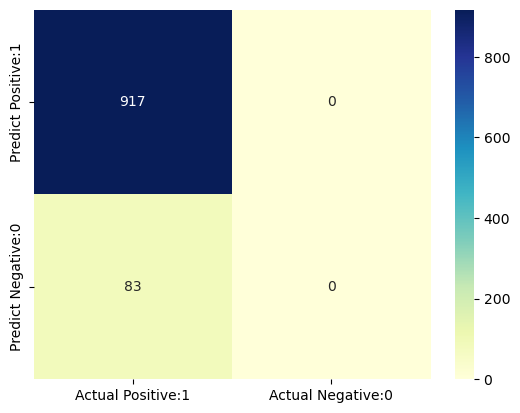

In [15]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Random Forest

In [16]:
%%capture masquer_erreurs
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
start = time.time()
# Définir le modèle RandomForestClassifier
random_forest = RandomForestClassifier(class_weight='balanced')

# Définir la grille des hyperparamètres à rechercher
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='roc_auc', verbose=5)

# Adapter le modèle aux données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur accuracy:", grid_search.best_score_)
# Évaluer la performance du modèle sur l'ensemble de test
accuracy = grid_search.score(X_test, y_test)
print("Précision sur l'ensemble de test:", accuracy)
temps = time.time() - start
print(temps)

In [17]:
accuracy

0.7766682871069884

In [18]:
grid_search.best_score_

0.7530013743338257

In [19]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [20]:
y_predict = grid_search.predict(X_test)

In [21]:

roc_auc_score(y_test, y_predict)

0.5115029365006373

# Lightgbm

pip install lightgbm

In [22]:
import lightgbm as lgb

In [23]:
# Définir le modèle 
lightgbm = lgb.LGBMClassifier(class_weight='balanced')
start = time.time()
# Définir la grille des hyperparamètres à rechercher
param_grid = {'boosting_type' : ['gbdt'], 
              'num_leaves' : [5, 10, 31,4, 5],
              'max_depth' : [-1, 0, 10, 20], 
              'learning_rate' : [0.1, 0.5, 0.7]
              #n_estimators=100
             }


# Créer l'objet GridSearchCV
grid_search = GridSearchCV(lightgbm, param_grid, cv=5, scoring='roc_auc')

# Adapter le modèle aux données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
accuracy = grid_search.score(X_test, y_test)
y_predict = grid_search.predict(X_test)
temps = time.time() - start
print(temps)

[LightGBM] [Info] Number of positive: 15361, number of negative: 181464
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13123
[LightGBM] [Info] Number of data points in the train set: 196825, number of used features: 134
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 15360, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13108
[LightGBM] [Info] Number of data points in the train set: 196825, number of used features: 133
[LightGBM] [

[LightGBM] [Info] Number of positive: 15361, number of negative: 181464
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13123
[LightGBM] [Info] Number of data points in the train set: 196825, number of used features: 134
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 15360, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13108
[LightGBM] [Info] Number of data points in the train set: 196825, number of used features: 133
[LightGBM] [

[LightGBM] [Info] Number of positive: 15361, number of negative: 181464
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13123
[LightGBM] [Info] Number of data points in the train set: 196825, number of used features: 134
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 15360, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13108
[LightGBM] [Info] Number of data points in the train set: 196825, number of used features: 133
[LightGBM] [

[LightGBM] [Info] Number of positive: 15361, number of negative: 181464
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13123
[LightGBM] [Info] Number of data points in the train set: 196825, number of used features: 134
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 15360, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13108
[LightGBM] [Info] Number of data points in the train set: 196825, number of used features: 133
[LightGBM] [

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 15361, number of negative: 181464
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13123
[LightGBM] [Info] Number of data points in the train set: 196825, number of used features: 134
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you

[LightGBM] [Info] Number of positive: 15361, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13108
[LightGBM] [Info] Number of data points in the train set: 196826, number of used features: 134
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 15361, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13117
[LightGBM] [Info] Number of data points in the train set: 196826, number of used features: 133
[LightGBM]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 15360, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13108
[LightGBM] [Info] Number of data points in the train set: 196825, number of used features: 133
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you

[LightGBM] [Info] Number of positive: 15361, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13114
[LightGBM] [Info] Number of data points in the train set: 196826, number of used features: 133
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 15361, number of negative: 181464
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.126582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13123
[LightGBM] [Info] Number of data points in the train set: 196825, number of used features: 134
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.00

[LightGBM] [Info] Number of positive: 15361, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13114
[LightGBM] [Info] Number of data points in the train set: 196826, number of used features: 133
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 15361, number of negative: 181464
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13123
[LightGBM] [Info] Number of data points in the train set: 196825, number of used features: 134
[LightGBM]

[LightGBM] [Info] Number of positive: 15361, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13114
[LightGBM] [Info] Number of data points in the train set: 196826, number of used features: 133
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 15361, number of negative: 181464
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13123
[LightGBM] [Info] Number of data points in the train set: 196825, number of used features: 134
[LightGBM]

[LightGBM] [Info] Number of positive: 15361, number of negative: 181465
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.144175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13114
[LightGBM] [Info] Number of data points in the train set: 196826, number of used features: 133
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 15361, number of negative: 181464
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13123
[LightGBM] [Info] Number of data points in the train set: 196825, number of used features: 134
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.00

[LightGBM] [Info] Number of positive: 15361, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13114
[LightGBM] [Info] Number of data points in the train set: 196826, number of used features: 133
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 15361, number of negative: 181464
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063954 seconds.
Yo

[LightGBM] [Info] Number of positive: 15360, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13108
[LightGBM] [Info] Number of data points in the train set: 196825, number of used features: 133
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 15361, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13108
[LightGBM] [Info] Number of data points in the train set: 196826, number of used features: 134
[LightGBM] [

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 15360, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13108
[LightGBM] [Info] Number of data points in the train set: 196825, number of used features: 133
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] Accuracy may be bad since you

[LightGBM] [Info] Number of positive: 15361, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13117
[LightGBM] [Info] Number of data points in the train set: 196826, number of used features: 133
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 15361, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13114
[LightGBM] [Info] Number of data points in the train set: 196826, number of used features: 133
[LightGBM]

[LightGBM] [Info] Number of positive: 15361, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13117
[LightGBM] [Info] Number of data points in the train set: 196826, number of used features: 133
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 15361, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13114
[LightGBM] [Info] Number of data points in the train set: 196826, number of used features: 133
[LightGBM]

[LightGBM] [Info] Number of positive: 15361, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13117
[LightGBM] [Info] Number of data points in the train set: 196826, number of used features: 133
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 15361, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13114
[LightGBM] [Info] Number of data points in the train set: 196826, number of used features: 133
[LightGBM]

[LightGBM] [Info] Number of positive: 15361, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13117
[LightGBM] [Info] Number of data points in the train set: 196826, number of used features: 133
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 15361, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13114
[LightGBM] [Info] Number of data points in the train set: 196826, number of used features: 133
[LightGBM]

[LightGBM] [Info] Number of positive: 15361, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13117
[LightGBM] [Info] Number of data points in the train set: 196826, number of used features: 133
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 15361, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13114
[LightGBM] [Info] Number of data points in the train set: 196826, number of used features: 133
[LightGBM]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13114
[LightGBM] [Info] Number of data points in the train set: 196826, number of used features: 133
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 15361, number of negative: 181464
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13123
[LightGBM] [Info] Number of data points in the train set: 196825, number of used features: 134
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[Li

[LightGBM] [Info] Number of positive: 15361, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13114
[LightGBM] [Info] Number of data points in the train set: 196826, number of used features: 133
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 15361, number of negative: 181464
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061947 seconds.
Yo

[LightGBM] [Info] Number of positive: 15360, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13108
[LightGBM] [Info] Number of data points in the train set: 196825, number of used features: 133
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 15361, number of negative: 181465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13108
[LightGBM] [Info] Number of data points in the train set: 196826, number of used features: 134
[LightGBM] [

In [24]:
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur accuracy:", grid_search.best_score_)
print("Précision sur l'AUC:",roc_auc_score(y_test, y_predict))
print("Précision sur l'ensemble de test:", accuracy)

Meilleurs paramètres: {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_depth': 10, 'num_leaves': 31}
Meilleur accuracy: 0.7681609447017651
Précision sur l'AUC: 0.7239886481586105
Précision sur l'ensemble de test: 0.7860099065838053


<AxesSubplot:>

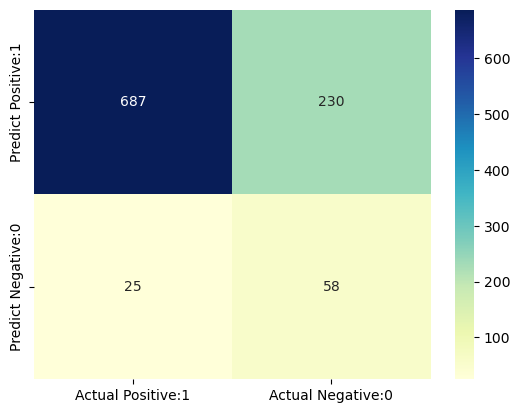

In [25]:
cm = confusion_matrix(y_test, y_predict)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [26]:
#Pour mettre en place un predict proba avec un seuil de 0.6 

In [27]:
df_pred = pd.DataFrame(grid_search.predict_proba(X_test))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [28]:
def prediction(row):
    if row[1]>=0.75 :
         return 1
    else :
        return 0

df_pred['pred_reel'] = df_pred.apply(lambda row : prediction(row),axis=1)

<AxesSubplot:>

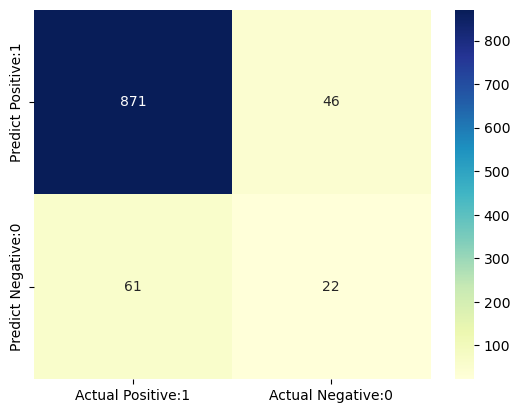

In [29]:
cm = confusion_matrix(y_test, df_pred['pred_reel'])
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# Définir le modèle 
svm = SVC(class_weight='balanced')

# Définir la grille des hyperparamètres à rechercher
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
             }


# Créer l'objet GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='roc_auc')

# Adapter le modèle aux données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
accuracy = grid_search.score(X_test, y_test)
y_predict = grid_search.predict(X_test)

In [ ]:
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur accuracy:", grid_search.best_score_)
print("Précision sur l'AUC:",roc_auc_score(y_test, y_predict))
print("Précision sur l'ensemble de test:", accuracy)

In [ ]:
cm = confusion_matrix(y_test, y_predict)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')